In [1]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
def symbol_to_path(symbol, base_dir = 'data'):
    """Return CSV file path given ticker symbol."""
    return os.path.join(base_dir,"{}.csv".format(str(symbol)))


def get_data(symbols, dates):
    """Read stock data (adjusted close) for given symbols from CSV files."""
    df = pd.DataFrame(index=dates)
    
    
    if 'SPY' not in symbols:
        symbols.insert(0,'SPY')
    
    print(symbols)
        
    for symbol in symbols:
        df_temp = pd.read_csv('data/{}.csv'.format(symbol), index_col='Date',parse_dates=True, 
                              usecols=['Date','Adj Close'],na_values=['nan'])
        df_temp.rename(columns = {'Adj Close':symbol}, inplace=True)
        df = df.join(df_temp)
        df.dropna(inplace=True)
                                                         
    return df                                        
        
                                                         
    
    
def plot_data(df, title = 'Stock Prices'):
    """Plot stock prices with a custom title and meaningful axis labels."""
    ax = df.plot(title = title, fontsize=8)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show()
    
    

def plot_selected(df,columns, start_index,end_index):
    """Plot the desired columns over index values in the given range."""

    ax=df.loc[start_index:end_index][columns].plot(title='Stock Prices', fontsize=8)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    plt.show()

def normalize_data(df):
    """Normalize stocks using first row of the dataframe."""
    return df/df.iloc[0,:]

In [3]:
# Read data define a date range
dates = pd.date_range('2010-01-01', '2012-12-31')
    
# define the symbols
symbols = ['SPY','XOM','GOOG','GLD']
    
# Read the data for the required symbols
df = get_data(symbols, dates)
  

['SPY', 'XOM', 'GOOG', 'GLD']


In [4]:
print(df)

               SPY    XOM    GOOG     GLD
2010-01-04  108.27  64.55  626.75  109.80
2010-01-05  108.56  64.80  623.99  109.70
2010-01-06  108.64  65.36  608.26  111.51
2010-01-07  109.10  65.15  594.10  110.82
2010-01-08  109.46  64.89  602.02  111.37
...            ...    ...     ...     ...
2012-09-06  143.77  88.99  699.40  164.89
2012-09-07  144.33  89.92  706.15  168.44
2012-09-10  143.51  89.48  700.77  167.29
2012-09-11  143.91  89.62  692.19  167.90
2012-09-12  144.39  89.55  690.88  167.92

[680 rows x 4 columns]


In [5]:
## row level slicing
print('getting the data for month of january')
print(df.loc['2010-01-01':'2010-01-31'])

getting the data for month of january
               SPY    XOM    GOOG     GLD
2010-01-04  108.27  64.55  626.75  109.80
2010-01-05  108.56  64.80  623.99  109.70
2010-01-06  108.64  65.36  608.26  111.51
2010-01-07  109.10  65.15  594.10  110.82
2010-01-08  109.46  64.89  602.02  111.37
2010-01-11  109.61  65.62  601.11  112.85
2010-01-12  108.59  65.29  590.48  110.49
2010-01-13  109.51  65.03  587.09  111.54
2010-01-14  109.80  65.04  589.85  112.03
2010-01-15  108.57  64.51  580.00  110.86
2010-01-19  109.93  64.66  587.62  111.52
2010-01-20  108.81  63.50  580.41  108.94
2010-01-21  106.72  62.26  582.98  107.37
2010-01-22  104.34  61.70  550.01  107.17
2010-01-25  104.87  61.46  540.00  107.48
2010-01-26  104.43  61.53  542.42  107.56
2010-01-27  104.93  61.18  542.10  106.53
2010-01-28  103.73  60.63  534.29  106.48
2010-01-29  102.60  60.14  529.94  105.96


In [6]:
# row & column level slicing
    
print('getting the data for SPY & GOOG for month of january')
print(df.loc['2010-01-01':'2010-01-31'][['SPY','GOOG']])

getting the data for SPY & GOOG for month of january
               SPY    GOOG
2010-01-04  108.27  626.75
2010-01-05  108.56  623.99
2010-01-06  108.64  608.26
2010-01-07  109.10  594.10
2010-01-08  109.46  602.02
2010-01-11  109.61  601.11
2010-01-12  108.59  590.48
2010-01-13  109.51  587.09
2010-01-14  109.80  589.85
2010-01-15  108.57  580.00
2010-01-19  109.93  587.62
2010-01-20  108.81  580.41
2010-01-21  106.72  582.98
2010-01-22  104.34  550.01
2010-01-25  104.87  540.00
2010-01-26  104.43  542.42
2010-01-27  104.93  542.10
2010-01-28  103.73  534.29
2010-01-29  102.60  529.94


plotting the stock prices read...


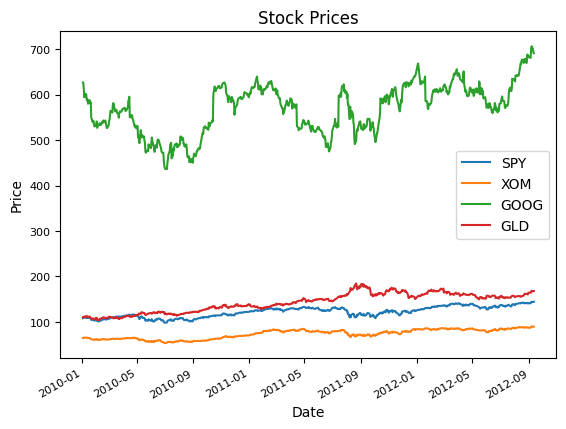

In [31]:
# plot the data
print('plotting the stock prices read...')
plot_data(df)

In the above plot the all the stocks are not on equal footing. The plots should be on equal footing to be compared easily. But in order to be on equal footing they need to be normalized.

In [26]:
# how to create plots on equal footing? Normalization is needed

# df1 = df/df.iloc[0,:]

df1 = normalize_data(df)


In [27]:
df1

,SPY,XOM,GOOG,GLD
2010-01-04,1.000000,1.000000,1.000000,1.000000
2010-01-05,1.002678,1.003873,0.995596,0.999089
2010-01-06,1.003417,1.012548,0.970499,1.015574
2010-01-07,1.007666,1.009295,0.947906,1.009290
2010-01-08,1.010991,1.005267,0.960542,1.014299
...,...,...,...,...
2012-09-06,1.327884,1.378621,1.115915,1.501730
2012-09-07,1.333056,1.393029,1.126685,1.534062
2012-09-10,1.325483,1.386212,1.118101,1.523588
2012-09-11,1.329177,1.388381,1.104412,1.529144


plotting the normalized stocks so that all the stocks start on equal footing...


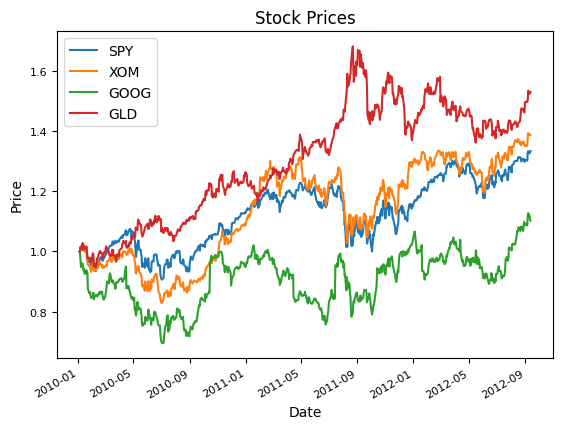

In [28]:

print('plotting the normalized stocks so that all the stocks start on equal footing...')
plot_data(df1)

plotting selected stocks...


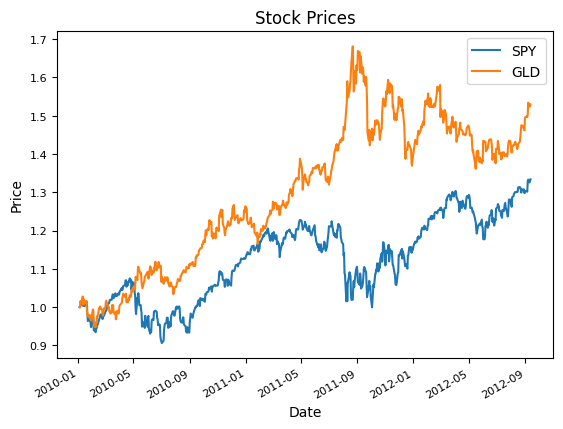

In [30]:

print('plotting selected stocks...')
plot_selected(df1, columns=['SPY','GLD'],start_index='2010-01-01',end_index='2012-12-31')